In [21]:
import pandas as pd


data_train = pd.read_csv('Train_data.csv')
#data_test = pd.read_csv('Test_data.csv')
data_train.head()


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [22]:
data_train.shape

(25192, 42)

In [23]:
data_train.isnull().sum().sum()

0

In [24]:
data_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [26]:
con_object = ['class','protocol_type','service','flag']
con_train = data_train.drop(con_object, axis=1)
stdtrain = con_train.std(axis=0)
std_X_train = stdtrain.to_frame()
std_X_train.nsmallest(10, columns=0)

,0
num_outbound_cmds,0.000000
is_host_login,0.000000
urgent,0.006300
land,0.008910
num_shells,0.018898
root_shell,0.039316
num_failed_logins,0.045418
su_attempted,0.048785
is_guest_login,0.095115
num_access_files,0.098524


In [27]:
print(data_train['num_outbound_cmds'].value_counts())
print(data_train['is_host_login'].value_counts())

0    25192
Name: num_outbound_cmds, dtype: int64
0    25192
Name: is_host_login, dtype: int64


In [28]:
data_train.drop(['num_outbound_cmds','is_host_login'], axis=1, inplace=True)

<h3>MISE À L'ÉCHELLE DES ATTRIBUTS NUMÉRIQUES</h3>

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols = data_train.select_dtypes(include=['float64','int64']).columns
mise_ech_train = scaler.fit_transform(data_train.select_dtypes(include=['float64','int64']))
mise_ech_traindf = pd.DataFrame(mise_ech_train, columns = cols)

<h3>ENCODAGE DES ATTRIBUTS CATÉGORIQUE EN NUMÉRIQUES</h3>

In [30]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

cat_train = data_train.select_dtypes(include=['object']).copy()
cat_train
train_cat = cat_train.apply(encoder.fit_transform)

train_cat.drop(['class'], axis=1, inplace=True)

In [31]:
x_train = pd.concat([mise_ech_traindf,train_cat],axis=1)
y_train = data_train['class'].map({'normal':0,'anomaly':1})
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  float64
 1   src_bytes                    25192 non-null  float64
 2   dst_bytes                    25192 non-null  float64
 3   land                         25192 non-null  float64
 4   wrong_fragment               25192 non-null  float64
 5   urgent                       25192 non-null  float64
 6   hot                          25192 non-null  float64
 7   num_failed_logins            25192 non-null  float64
 8   logged_in                    25192 non-null  float64
 9   num_compromised              25192 non-null  float64
 10  root_shell                   25192 non-null  float64
 11  su_attempted                 25192 non-null  float64
 12  num_root                     25192 non-null  float64
 13  num_file_creatio

<h3>SELECTION DES FONCTIONNSLITES</h3>

<AxesSubplot:xlabel='fonctionnalite'>

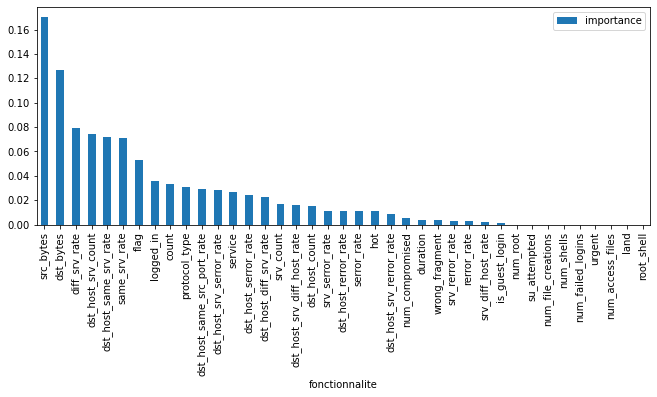

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
rond_fore_cla = RandomForestClassifier();

rond_fore_cla.fit(x_train, y_train);
score = np.around(rond_fore_cla.feature_importances_,3)
importances = pd.DataFrame({'fonctionnalite':x_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('fonctionnalite')

plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar()

In [33]:
cols =['num_file_creations','num_root','num_shells','root_shell','num_access_files','num_failed_logins','urgent',
      'land','su_attempted']
x_train_moin = x_train.drop(cols, axis=1, inplace=False)

<h3>SEPARATION DES DONNEES</h3>

In [34]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x_train_moin,y_train,test_size=0.30, random_state=30)

<h3>APPLICATION DES ALGO</h3>

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import tree  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models = []

#LogisticRegression
"""logreg = LogisticRegression() 
logreg.fit(X_train, Y_train)  

models.append(('Regression logique', logreg))"""

#KNN
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,Y_train)

models.append(('K voisin', knn))

#arbre de décision
arbre = tree.DecisionTreeClassifier()  
arbre.fit(X_train, Y_train) 

models.append(('arbre de décision', arbre))

#foret aléatoire
clf=RandomForestClassifier(n_estimators=10)
clf.fit(X_train, Y_train)

models.append(('foret aléatoire', clf))


In [36]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
models
for i, model in models:
    accuracy = metrics.accuracy_score(Y_test, model.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, model.predict(X_test))
    classification = metrics.classification_report(Y_test, model.predict(X_test))
    print()
    print('============================== {} =============================='.format(i))
    print()
    print ("Accuracy:" "\n", accuracy)
    print()
    print("Matrix de Confusion:" "\n", confusion_matrix)
    print()
    print("Report de Classification:" "\n", classification) 
    print()  


============================== K voisin ==============================

Accuracy:
 0.9916644614977508

Matrix de Confusion:
 [[4040   23]
 [  40 3455]]

Report de Classification:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4063
           1       0.99      0.99      0.99      3495

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



============================== arbre de décision ==============================

Accuracy:
 0.9952368351415718

Matrix de Confusion:
 [[4039   24]
 [  12 3483]]

Report de Classification:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4063
           1       0.99      1.00      0.99      3495

    accuracy                           1.00      7558
   macro avg       1.00      1.00      1.00      7558
weighted avg       1.00      

<h4>sans la suppression des fonctionnalite </h4>

In [37]:
y_train = data_train['class'].map({'normal':0,'anomaly':1})
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.30, random_state=30)
models = []


#KNN
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,Y_train)

models.append(('K voisin', knn))

#arbre de décision
arbre = tree.DecisionTreeClassifier()  
arbre.fit(X_train, Y_train) 

models.append(('arbre de décision', arbre))

#foret aléatoire
clf=RandomForestClassifier(n_estimators=10)
clf.fit(X_train, Y_train)

models.append(('foret aléatoire', clf))

In [38]:
models
for i, model in models:
    accuracy = metrics.accuracy_score(Y_test, model.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, model.predict(X_test))
    classification = metrics.classification_report(Y_test, model.predict(X_test))
    print()
    print('============================== {} =============================='.format(i))
    print()
    print ("Accuracy:" "\n", accuracy)
    print()
    print("Matrix de Confusion:" "\n", confusion_matrix)
    print()
    print("Report de Classification:" "\n", classification) 
    print()  


============================== K voisin ==============================

Accuracy:
 0.9908706006880127

Matrix de Confusion:
 [[4035   28]
 [  41 3454]]

Report de Classification:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      4063
           1       0.99      0.99      0.99      3495

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



============================== arbre de décision ==============================

Accuracy:
 0.9948399047367028

Matrix de Confusion:
 [[4038   25]
 [  14 3481]]

Report de Classification:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      4063
           1       0.99      1.00      0.99      3495

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      